In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data.
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#libraries to help with model building
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# to suppress scientifiv notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import pandas as pd
data=pd.read_csv('train-balanced-sarcasm.csv')
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [3]:
data.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [4]:
data['comment']=data['comment'].fillna('No Comment')

In [5]:
# Remove Emoji
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [6]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sudin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from tqdm import tqdm
import re
stopwords = stopwords.words('english')
def preprocess(text_col,stopword):
    preprocessed = []
    for sentence in tqdm(text_col.values):
        # Replace "carriage return" with "space".
        sentence=str(sentence)
        sent = sentence.replace('\\r', ' ')
        # Replace "quotes" with "space".
        sent = sent.replace('\\"', ' ')
        # Replace "line feed" with "space".
        sent = sent.replace('\\n', ' ')
        # Replace characters between words with "space".
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        #remove stop words
        #decontraction
        sent=decontractions(sent)
        #Remove emoji
        sent=deEmojify(sent)
        if stopword:
            sent = ' '.join(e for e in sent.split() if e not in stopwords)
        else:
           sent = ' '.join(e for e in sent.split())
        # to lowercase
        preprocessed.append(sent.lower().strip())
    return preprocessed
data['comment']=preprocess(data['comment'],stopword=False)

100%|██████████| 1010826/1010826 [00:54<00:00, 18490.20it/s]


In [8]:
data['parent_comment']=preprocess(data['parent_comment'],stopword=False)

100%|██████████| 1010826/1010826 [01:20<00:00, 12498.63it/s]


In [9]:
data.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sudin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
#Polarity Score

import nltk
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def generate_sentiment_scores(data):
    sid = SentimentIntensityAnalyzer()
    neg=[]
    pos=[]
    neu=[]
    comp=[]
    for sentence in tqdm(data['parent_comment'].values): 
        sentence_sentiment_score = sid.polarity_scores(sentence)
        comp.append(sentence_sentiment_score['compound'])
        neg.append(sentence_sentiment_score['neg'])
        pos.append(sentence_sentiment_score['pos'])
        neu.append(sentence_sentiment_score['neu'])
    return comp,neg,pos,neu
data['compound'],data['negative'],data['positive'],data['neutral']=generate_sentiment_scores(data)

100%|██████████| 1010826/1010826 [11:15<00:00, 1496.97it/s]


In [12]:
data['com_len']=data['comment'].apply(lambda x:len(x.split()))
data['parent_com_len']=data['parent_comment'].apply(lambda x:len(x.split()))
y=data['label']
X=data.drop(['label','date','created_utc'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [13]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vec = tfidf_desc = TfidfVectorizer(max_features=200000, ngram_range=(1, 3), stop_words='english')
X_train_comment = vec.fit_transform(X_train['comment'])
X_test_comment = vec.transform(X_test['comment'])

Wall time: 53.6 s


In [14]:
print(X_train_comment.shape)

(707578, 200000)


In [55]:
%%time
vec = tfidf_desc = TfidfVectorizer(max_features=200000, ngram_range=(1, 3), stop_words='english')
X_train_parent = vec.fit_transform(X_train['parent_comment'])
X_test_parent = vec.transform(X_test['parent_comment'])

Wall time: 1min 15s


In [54]:
%%time
from sklearn.preprocessing import LabelBinarizer
lb_brand_author = vec = tfidf_desc = TfidfVectorizer()
X_train_author = lb_brand_author.fit_transform(X_train['author'])
X_test_author = lb_brand_author.transform(X_test['author'])

Wall time: 3.74 s


In [53]:
%%time
from sklearn.preprocessing import LabelBinarizer
lb_brand_subreddit = LabelBinarizer(sparse_output=True)
X_train_subreddit = lb_brand_author.fit_transform(X_train['subreddit'])
X_test_subreddit = lb_brand_author.transform(X_test['subreddit'])

Wall time: 3.13 s


In [52]:
%%time
from sklearn.preprocessing import Normalizer
trans = Normalizer()
X_train_score=trans.fit_transform(X_train['score'].values.reshape(-1,1))
X_test_score=trans.transform(X_test['score'].values.reshape(-1,1))

Wall time: 12 ms


In [50]:
%%time
trans = Normalizer()
X_train_ups=trans.fit_transform(X_train['ups'].values.reshape(-1,1))
X_test_ups=trans.transform(X_test['ups'].values.reshape(-1,1))

Wall time: 15.9 ms


In [49]:
%%time
trans = Normalizer()
X_train_downs=trans.fit_transform(X_train['downs'].values.reshape(-1,1))
X_test_downs=trans.transform(X_test['downs'].values.reshape(-1,1))

Wall time: 23.6 ms


In [48]:
%%time
trans = Normalizer()
X_train_comp=trans.fit_transform(X_train['compound'].values.reshape(-1,1))
X_test_comp=trans.transform(X_test['compound'].values.reshape(-1,1))

Wall time: 32.2 ms


In [47]:
%%time
trans = Normalizer()
X_train_neg=trans.fit_transform(X_train['negative'].values.reshape(-1,1))
X_test_neg=trans.transform(X_test['negative'].values.reshape(-1,1))

Wall time: 32.2 ms


In [46]:
%%time
trans = Normalizer()
X_train_pos=trans.fit_transform(X_train['positive'].values.reshape(-1,1))
X_test_pos=trans.transform(X_test['positive'].values.reshape(-1,1))

Wall time: 28.9 ms


In [45]:
%%time
trans = Normalizer()
X_train_neu=trans.fit_transform(X_train['neutral'].values.reshape(-1,1))
X_test_neu=trans.transform(X_test['neutral'].values.reshape(-1,1))

Wall time: 28.6 ms


In [44]:
%%time
trans = Normalizer()
X_train_com_len=trans.fit_transform(X_train['com_len'].values.reshape(-1,1))
X_test_com_len=trans.transform(X_test['com_len'].values.reshape(-1,1))

Wall time: 14.3 ms


In [43]:
%%time
trans = Normalizer()
X_train_parent_com_len=trans.fit_transform(X_train['parent_com_len'].values.reshape(-1,1))
X_test_parent_com_len=trans.transform(X_test['parent_com_len'].values.reshape(-1,1))

Wall time: 14 ms


In [42]:
%%time
from scipy.sparse import hstack
train_s=hstack((X_train_comment,X_train_parent,X_train_author,X_train_subreddit,X_train_score,X_train_ups,X_train_downs,X_train_comp,X_train_neg,X_train_pos,X_train_neu,X_train_com_len,X_train_parent_com_len)).tocsr().astype('float32')
test_s=hstack((X_test_comment,X_test_parent,X_test_author,X_test_subreddit,X_test_score,X_test_ups,X_test_downs,X_test_comp,X_test_neg,X_test_pos,X_test_neu,X_test_com_len,X_test_parent_com_len)).tocsr().astype('float32')

Wall time: 1.73 s


In [32]:
print(train_s.shape,y_train.shape)
print(test_s.shape,y_test.shape)

(707578, 654811) (707578,)
(303248, 654811) (303248,)


In [33]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
        print("log_loss on training set : ",metrics.log_loss(train_y,pred_train))
        print("log_loss on test set : ",metrics.log_loss(test_y,pred_test))
    return score_list # returning the list with train and test scores

In [34]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_s)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
from tqdm import tqdm
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier,LassoCV,RidgeClassifierCV
from sklearn.metrics import mean_squared_error, make_scorer,mean_squared_log_error
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "logistic",
        Pipeline(
            steps=[
                ("logistic", LogisticRegression(random_state=1,n_jobs=-1)),
            ]
        ),
    )
)


models.append(
    (
        "lgbm",
        Pipeline(
            steps=[
                ("LGBM", LGBMClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "SGD",
        Pipeline(
            steps=[
                ("SGD", SGDClassifier(random_state=1)),
            ]
        ),
    )
)




results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
from tqdm import tqdm
for name, model in tqdm(models):
    # Setting number of splits equal to 5
    scores = cross_val_score(model,train_s,y_train, cv=5,
                             scoring='accuracy')
    results.append(scores)
    names.append(name)
    print("{}: {}".format(name, scores.mean() * 100))

 33%|███▎      | 1/3 [01:38<03:17, 98.52s/it]

logistic: 67.3794264747821


 67%|██████▋   | 2/3 [18:42<10:42, 642.62s/it]

lgbm: 65.74582591145555


100%|██████████| 3/3 [18:54<00:00, 378.17s/it]

SGD: 66.1887439268547


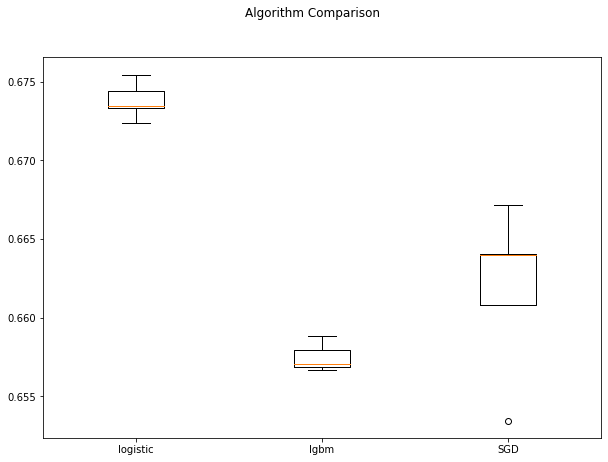

In [38]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")



ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [56]:
%%time
from sklearn.model_selection import RandomizedSearchCV
  
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
logreg = LogisticRegression()
  
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(train_s, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.6753092917288317
Wall time: 20min 14s


In [57]:
model= LogisticRegression(C=0.05179474679231213)
model.fit(train_s,y_train)

LogisticRegression(C=0.05179474679231213)

Accuracy on training set :  0.7040269765312093
Accuracy on test set :  0.678355669287184
Recall on training set :  0.6650772070358321
Recall on test set :  0.6381773334036828
Precision on training set :  0.7212632843799908
Precision on test set :  0.6939400458978773
log_loss on training set :  10.222648834080903
log_loss on test set :  11.10931414692373


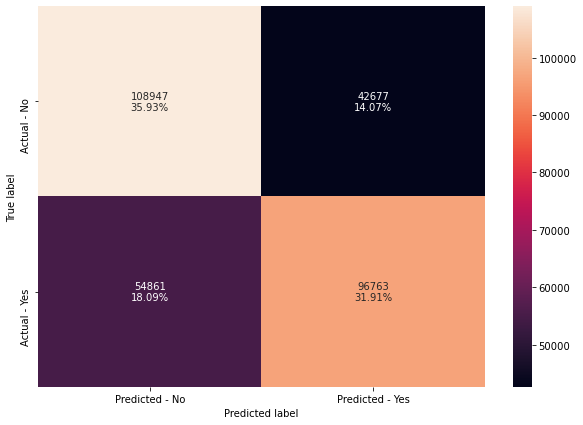

In [58]:
get_metrics_score(model,train_s,test_s,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(model, y_test)

In [61]:
#SGD Classifier
%%time
from sklearn.linear_model import SGDClassifier
parameters = {'alpha':[10**x for x in range(-5, 5)],
              }
model_lr_reg = SGDClassifier(loss = "squared_loss",fit_intercept=False,l1_ratio=0.6)
model=GridSearchCV(estimator = model_lr_reg, param_grid = parameters,
                                    return_train_score=True, scoring = 'accuracy',\
                                    cv = 5,verbose=2,n_jobs=-1)
model.fit(train_s,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 22min 49s


GridSearchCV(cv=5,
             estimator=SGDClassifier(fit_intercept=False, l1_ratio=0.6,
                                     loss='squared_loss'),
             n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [62]:
model=SGDClassifier(alpha=0.00001)
model.fit(train_s,y_train)

SGDClassifier(alpha=1e-05)

Accuracy on training set :  0.7615754022878043
Accuracy on test set :  0.669996174748061
Recall on training set :  0.6672988702305611
Recall on test set :  0.5629253943966654
Precision on training set :  0.8223567564554951
Precision on test set :  0.7163190801896689
log_loss on training set :  8.234951497639495
log_loss on test set :  11.398017458186805


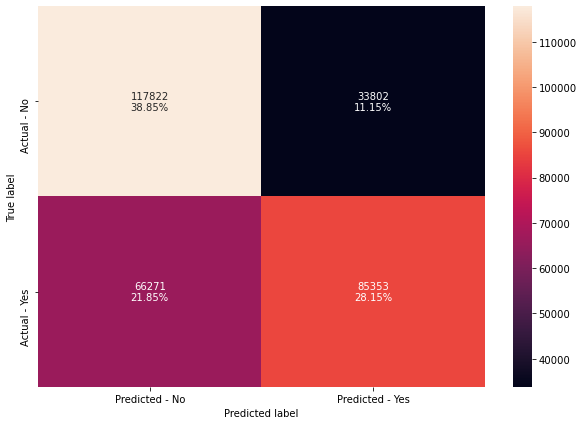

In [63]:
get_metrics_score(model,train_s,test_s,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(model, y_test)

In [65]:
#GridSearchCV(LGBM)
%%time
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(n_estimators=900, learning_rate=0.15,max_depth=5,
               num_leaves=31,subsample=0.9,colsample_bytree=0.8,
               min_child_samples=50, n_jobs=-1)

lgbm_model.fit(train_s, y_train)

Wall time: 3min 38s


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.15, max_depth=5,
               min_child_samples=50, n_estimators=900, subsample=0.9)

Accuracy on training set :  0.6885262119511912
Accuracy on test set :  0.6789987073286551
Recall on training set :  0.5923869877243215
Recall on test set :  0.58572521500554
Precision on training set :  0.7334049544552653
Precision on test set :  0.720047997794696
log_loss on training set :  10.758009608775543
log_loss on test set :  11.087082915334832


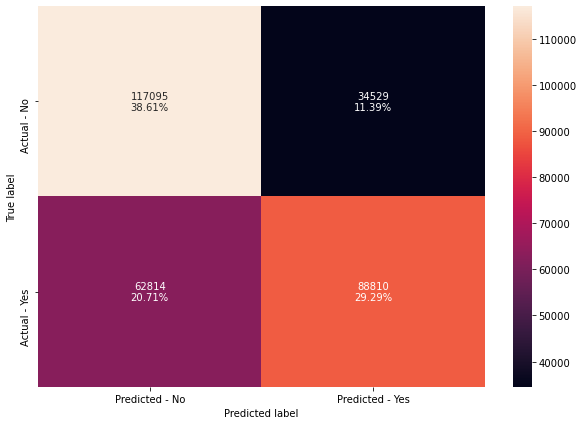

In [66]:
get_metrics_score(lgbm_model,train_s,test_s,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(lgbm_model, y_test)